In [19]:
import pandas as pd
import numpy as np
import evalml
from evalml.preprocessing import load_data
import woodwork as ww


# LOAD DATA 

In [20]:
# load preprocessed data
t_datapath = '../data/processed/zillow_merged.csv'
target = 'yearly_price_delta_percent'

#set to None for production / actual use, set lower for testing
n_rows=None

#set the index
index='index'

X, y = load_data(t_datapath, index=index, target=target, n_rows=n_rows, drop=['FloodInfo'])
X

             Number of Features
Categorical                  87
Numeric                     659

Number of training examples: 991
Targets
 198.428626    0.40%
 1.024066      0.30%
-0.041370      0.30%
 0.130581      0.30%
-0.255259      0.30%
               ...  
-0.011756      0.10%
 2.023079      0.10%
 0.443537      0.10%
 0.300368      0.10%
 0.024112      0.10%
Name: yearly_price_delta_percent, Length: 883, dtype: object


,Address_x,Image_URL,Image_URL1,Image_URL2,Price,Beds,Baths,Area,Noise,PropertyType,...,CountyName,1/31/21,zillow_price,zillow_price_change,zillow_price_change_rate,zillow_price_change_percent,last_sold_price_change,last_sold_price_change_percent,last_sold_price_change_rate,yearly_price_delta
index,,,,,,,,,,,,,,,,,,,,,
0,"1 Las Olas Cir Apt 517, Fort Lauderdale, FL, 3...",https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,649000,2,2,1350,Medium,Condo,...,Broward County,511939.0,495061.0,16878.0,8439.000000,0.034093,49000.0,0.081667,2227.272727,-6211.727273
1,"1 N Ocean Blvd Apt 610, Pompano Beach, FL, 33062",https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,689000,2,2,1479,Medium,Condo,...,Broward County,353530.0,280804.0,72726.0,12121.000000,0.258992,49000.0,0.076563,2227.272727,-9893.727273
631,"2375 SE 10th St, Pompano Beach, FL, 33062",https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,689900,2,2,1522,Medium,Single Family Home,...,Broward County,353530.0,221403.0,132127.0,12011.545455,0.596771,394900.0,1.338644,17950.000000,5938.454545
1327,"710 N Ocean Blvd Apt 503, Pompano Beach, FL, 3...",https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,369900,2,2,1028,Medium,Condo,...,Broward County,353530.0,329454.0,24076.0,12038.000000,0.073078,109900.0,0.422692,4995.454545,-7042.545455
1361,"750 N Ocean Blvd Apt 1101, Pompano Beach, FL, ...",https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,699900,2,2,1140,Medium,Condo,...,Broward County,353530.0,219779.0,133751.0,14861.222222,0.608570,456900.0,1.880247,20768.181818,5906.959596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,"Hialeah, FL, 33014",https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,495000,3,2,2250,Medium,Single Family Home,...,Miami-Dade County,372115.0,194998.0,177117.0,22139.625000,0.908302,303000.0,1.578125,13772.727273,-8366.897727
1592,"Miami Gardens, FL, 33055",https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,325000,4,2,1652,Medium,Single Family Home,...,Miami-Dade County,357360.0,329200.0,28160.0,28160.000000,0.085541,-5000.0,-0.015152,-227.272727,-28387.272727
1594,"Miami, FL, 33156",https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,349900,2,2,1155,High,Condo,...,Miami-Dade County,280484.0,154974.0,125510.0,13945.555556,0.809878,99900.0,0.399600,4540.909091,-9404.646465


In [21]:
dates = [col for col in X.columns if 'date' in col.lower() or 'birthday' in col.lower()]

<AxesSubplot:>

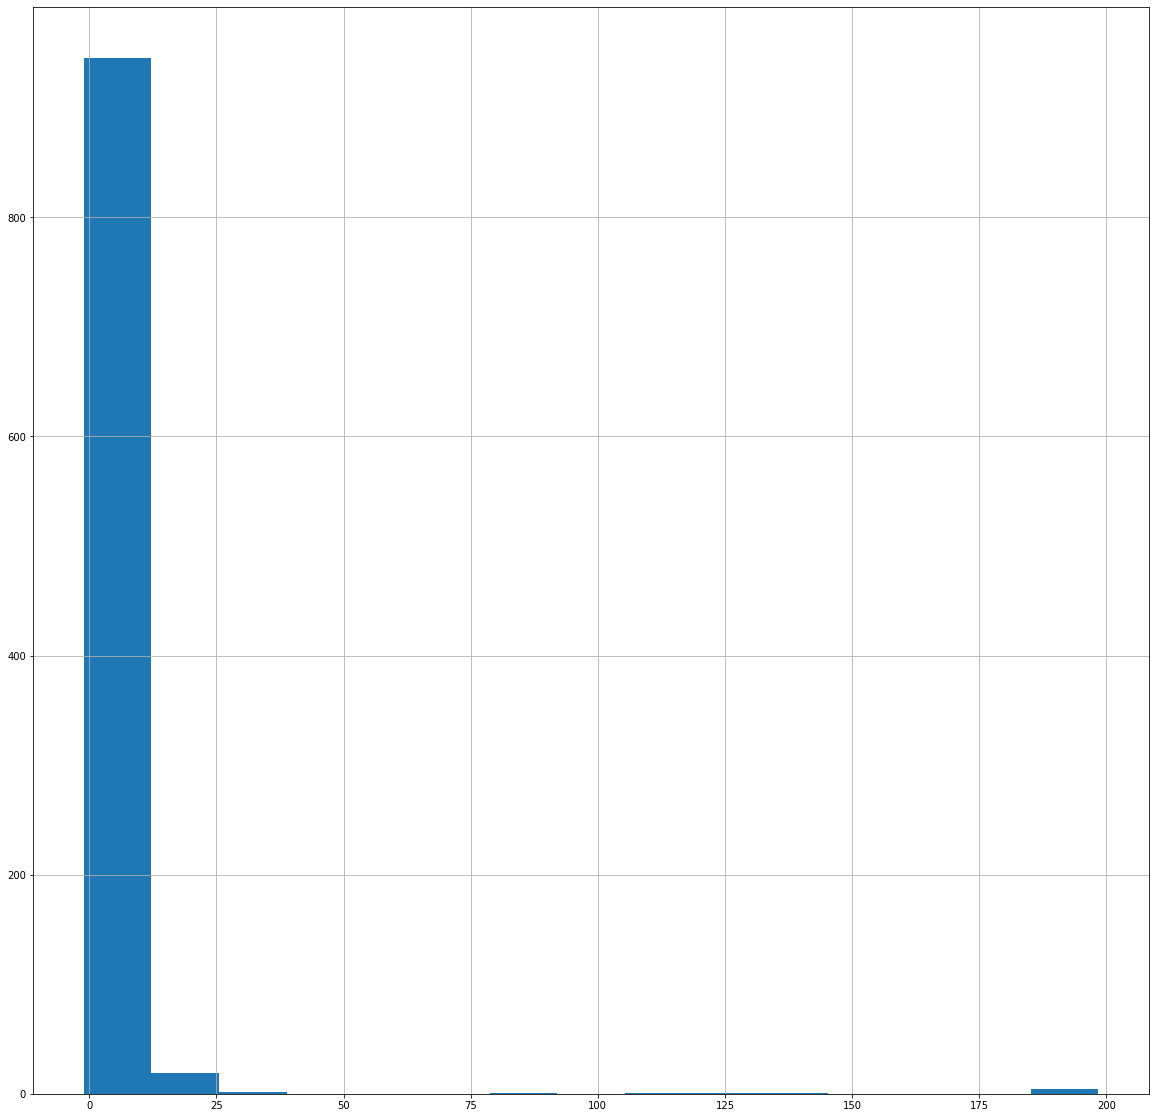

In [22]:
y.hist(bins=15, figsize=(20, 20))

In [23]:
data = X
data[target] = y
data = data[data[target].astype(float) < 50]
data = data[data['PropertyType'] != 'Mfd/Mobile Home']
data

,Address_x,Image_URL,Image_URL1,Image_URL2,Price,Beds,Baths,Area,Noise,PropertyType,...,1/31/21,zillow_price,zillow_price_change,zillow_price_change_rate,zillow_price_change_percent,last_sold_price_change,last_sold_price_change_percent,last_sold_price_change_rate,yearly_price_delta,yearly_price_delta_percent
index,,,,,,,,,,,,,,,,,,,,,
0,"1 Las Olas Cir Apt 517, Fort Lauderdale, FL, 3...",https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,649000,2,2,1350,Medium,Condo,...,511939.0,495061.0,16878.0,8439.000000,0.034093,49000.0,0.081667,2227.272727,-6211.727273,0.047574
1,"1 N Ocean Blvd Apt 610, Pompano Beach, FL, 33062",https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,689000,2,2,1479,Medium,Condo,...,353530.0,280804.0,72726.0,12121.000000,0.258992,49000.0,0.076563,2227.272727,-9893.727273,-0.182430
631,"2375 SE 10th St, Pompano Beach, FL, 33062",https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,689900,2,2,1522,Medium,Single Family Home,...,353530.0,221403.0,132127.0,12011.545455,0.596771,394900.0,1.338644,17950.000000,5938.454545,0.741873
1327,"710 N Ocean Blvd Apt 503, Pompano Beach, FL, 3...",https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,369900,2,2,1028,Medium,Condo,...,353530.0,329454.0,24076.0,12038.000000,0.073078,109900.0,0.422692,4995.454545,-7042.545455,0.349614
1361,"750 N Ocean Blvd Apt 1101, Pompano Beach, FL, ...",https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,699900,2,2,1140,Medium,Condo,...,353530.0,219779.0,133751.0,14861.222222,0.608570,456900.0,1.880247,20768.181818,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,"Hialeah, FL, 33014",https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,495000,3,2,2250,Medium,Single Family Home,...,372115.0,194998.0,177117.0,22139.625000,0.908302,303000.0,1.578125,13772.727273,-8366.897727,0.669823
1592,"Miami Gardens, FL, 33055",https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,325000,4,2,1652,Medium,Single Family Home,...,357360.0,329200.0,28160.0,28160.000000,0.085541,-5000.0,-0.015152,-227.272727,-28387.272727,-0.100692
1594,"Miami, FL, 33156",https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,349900,2,2,1155,High,Condo,...,280484.0,154974.0,125510.0,13945.555556,0.809878,99900.0,0.399600,4540.909091,-9404.646465,-0.410278


In [24]:
max(data[target])

32.96598682456102

In [25]:
data = data.drop('PricePerSQFT',axis=1)

In [26]:
data = data.reset_index()
X = data.copy()

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Beds'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Accuracy Score'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'State FIPS'}>],
       [<AxesSubplot:title={'center':'County FIPS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

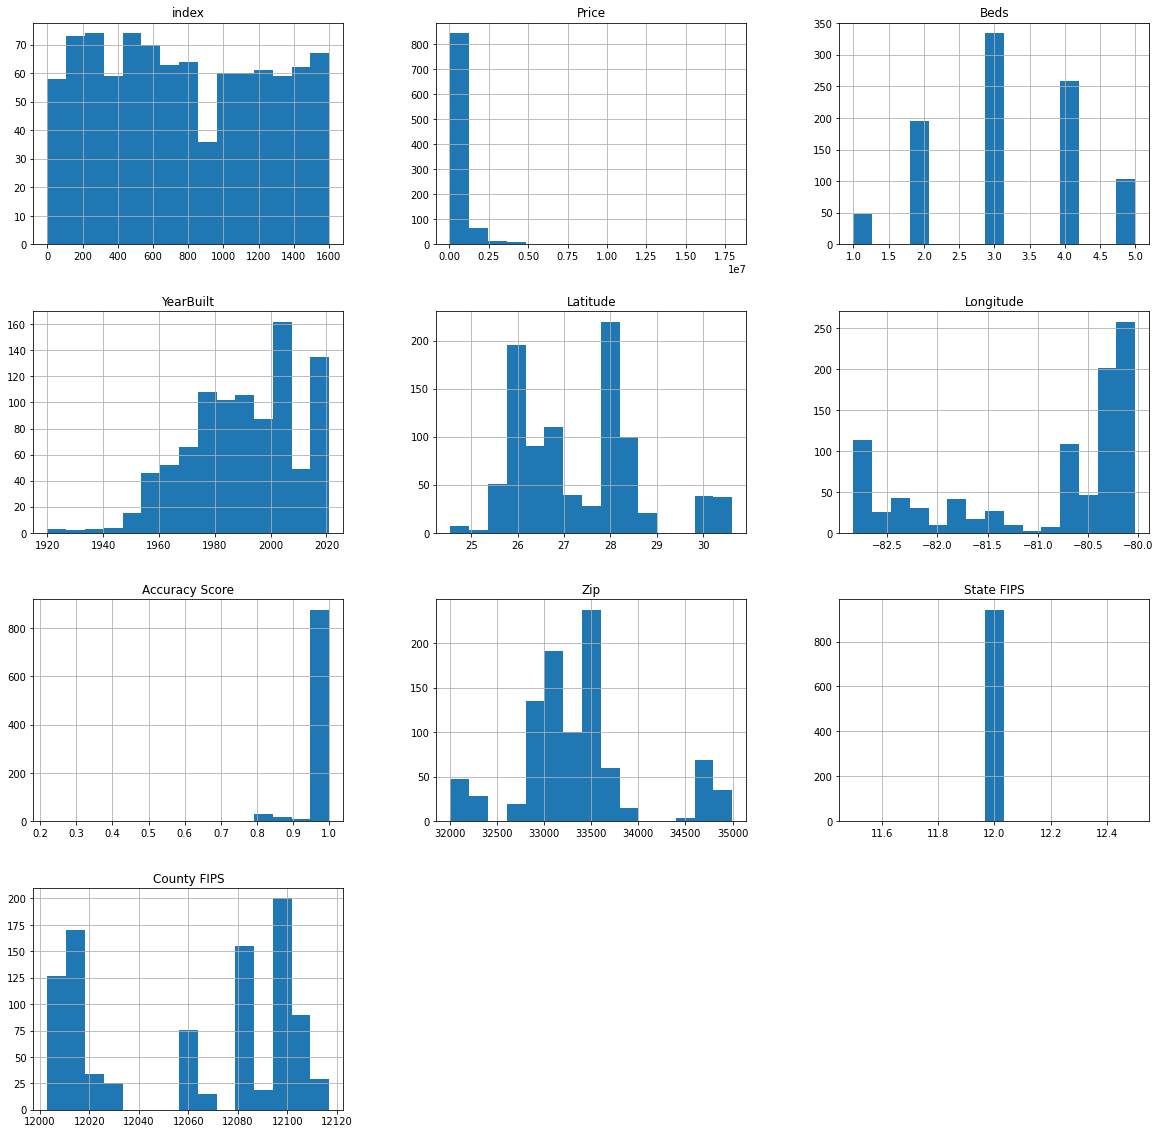

In [27]:
num_features = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
X[num_features[0:10]].hist(bins=15, figsize=(20, 20))

In [28]:
X['Zip'] = 'zip_' + X['Zip'].astype(str)
X = X.drop('County FIPS',axis=1)

array([[<AxesSubplot:title={'center':'Census Block Code'}>,
        <AxesSubplot:title={'center':'Metro/Micro Statistical Area Code'}>,
        <AxesSubplot:title={'center':'Combined Statistical Area Code'}>],
       [<AxesSubplot:title={'center':'Metropolitan Division Area Code'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Median age/Total/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Median age/Total/Margin of error'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Median age/Male/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Median age/Male/Margin of error'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Median age/Female/Margin of error'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Total/Value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

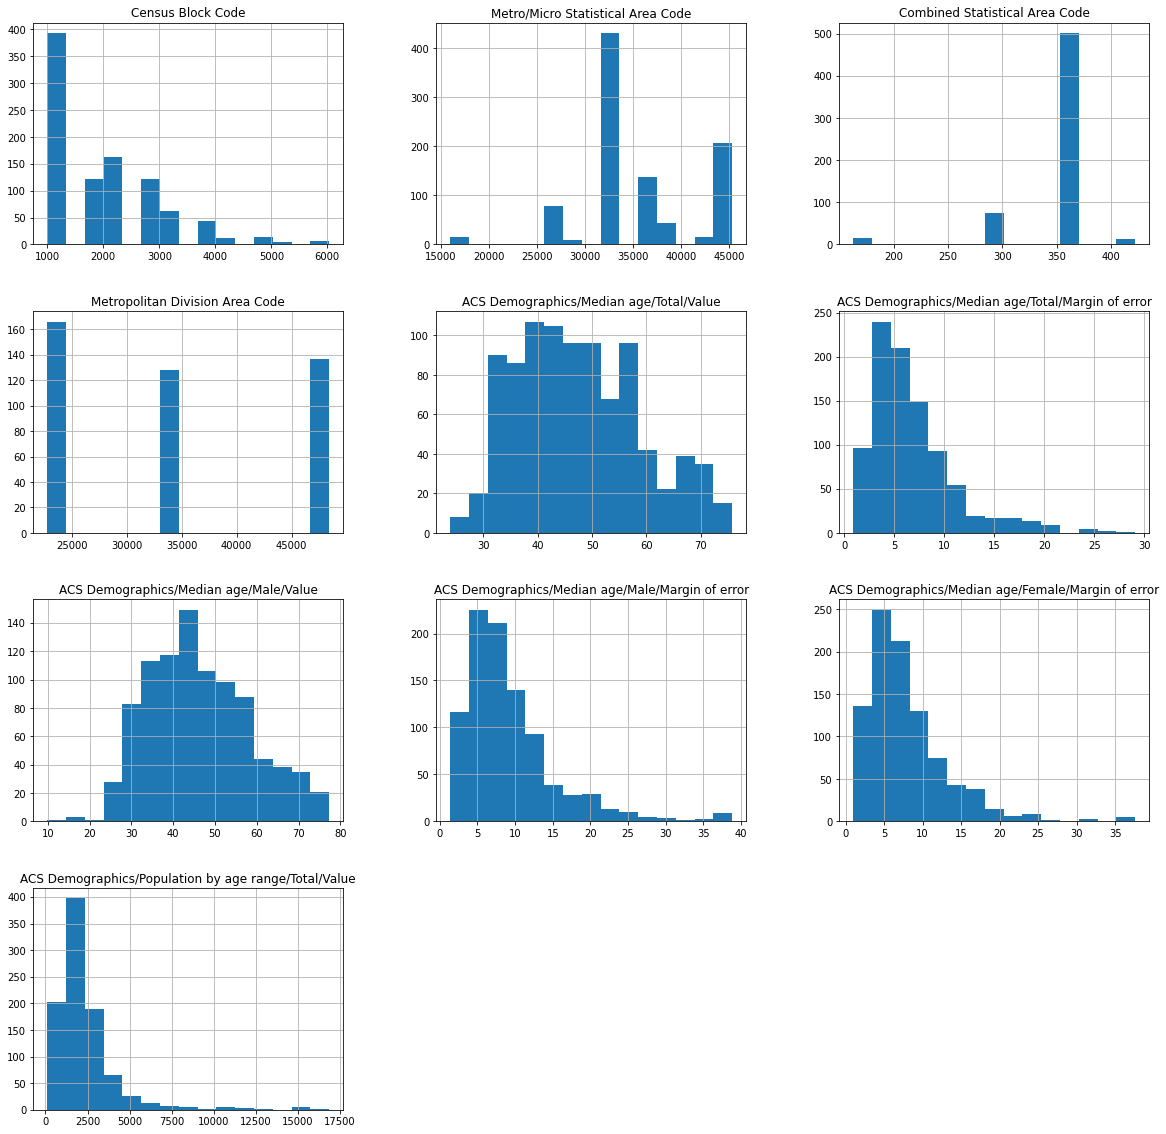

In [29]:
num_features = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
X[num_features[10:20]].hist(bins=15, figsize=(20, 20))

In [30]:
code_feats = [col for col in X.columns if 'code' in col.lower() or 'zone' in col.lower()]
code_feats

['Census Tract Code',
 'Census Block Code',
 'Metro/Micro Statistical Area Code',
 'Combined Statistical Area Code',
 'Metropolitan Division Area Code']

In [31]:
for col in code_feats:
    X[col] = 'code_' + X[col].astype(str)
X

,index,Address_x,Image_URL,Image_URL1,Image_URL2,Price,Beds,Baths,Area,Noise,...,1/31/21,zillow_price,zillow_price_change,zillow_price_change_rate,zillow_price_change_percent,last_sold_price_change,last_sold_price_change_percent,last_sold_price_change_rate,yearly_price_delta,yearly_price_delta_percent
0,0,"1 Las Olas Cir Apt 517, Fort Lauderdale, FL, 3...",https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,649000,2,2,1350,Medium,...,511939.0,495061.0,16878.0,8439.000000,0.034093,49000.0,0.081667,2227.272727,-6211.727273,0.047574
1,1,"1 N Ocean Blvd Apt 610, Pompano Beach, FL, 33062",https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,689000,2,2,1479,Medium,...,353530.0,280804.0,72726.0,12121.000000,0.258992,49000.0,0.076563,2227.272727,-9893.727273,-0.182430
2,631,"2375 SE 10th St, Pompano Beach, FL, 33062",https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,689900,2,2,1522,Medium,...,353530.0,221403.0,132127.0,12011.545455,0.596771,394900.0,1.338644,17950.000000,5938.454545,0.741873
3,1327,"710 N Ocean Blvd Apt 503, Pompano Beach, FL, 3...",https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,369900,2,2,1028,Medium,...,353530.0,329454.0,24076.0,12038.000000,0.073078,109900.0,0.422692,4995.454545,-7042.545455,0.349614
4,1361,"750 N Ocean Blvd Apt 1101, Pompano Beach, FL, ...",https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,699900,2,2,1140,Medium,...,353530.0,219779.0,133751.0,14861.222222,0.608570,456900.0,1.880247,20768.181818,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1588,"Hialeah, FL, 33014",https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,495000,3,2,2250,Medium,...,372115.0,194998.0,177117.0,22139.625000,0.908302,303000.0,1.578125,13772.727273,-8366.897727,0.669823
936,1592,"Miami Gardens, FL, 33055",https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,325000,4,2,1652,Medium,...,357360.0,329200.0,28160.0,28160.000000,0.085541,-5000.0,-0.015152,-227.272727,-28387.272727,-0.100692
937,1594,"Miami, FL, 33156",https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,349900,2,2,1155,High,...,280484.0,154974.0,125510.0,13945.555556,0.809878,99900.0,0.399600,4540.909091,-9404.646465,-0.410278
938,1600,"Pembroke Pines, FL, 33024",https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,469900,5,2,2388,Medium,...,620969.0,501475.0,119494.0,23898.800000,0.238285,149900.0,0.468438,6813.636364,-17085.163636,0.230152


array([[<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: Under 5 years/Percentage'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 5 to 9 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 5 to 9 years/Margin of error'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 5 to 9 years/Percentage'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 10 to 14 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 10 to 14 years/Margin of error'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 10 to 14 years/Percentage'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 15 to 17 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 15 to

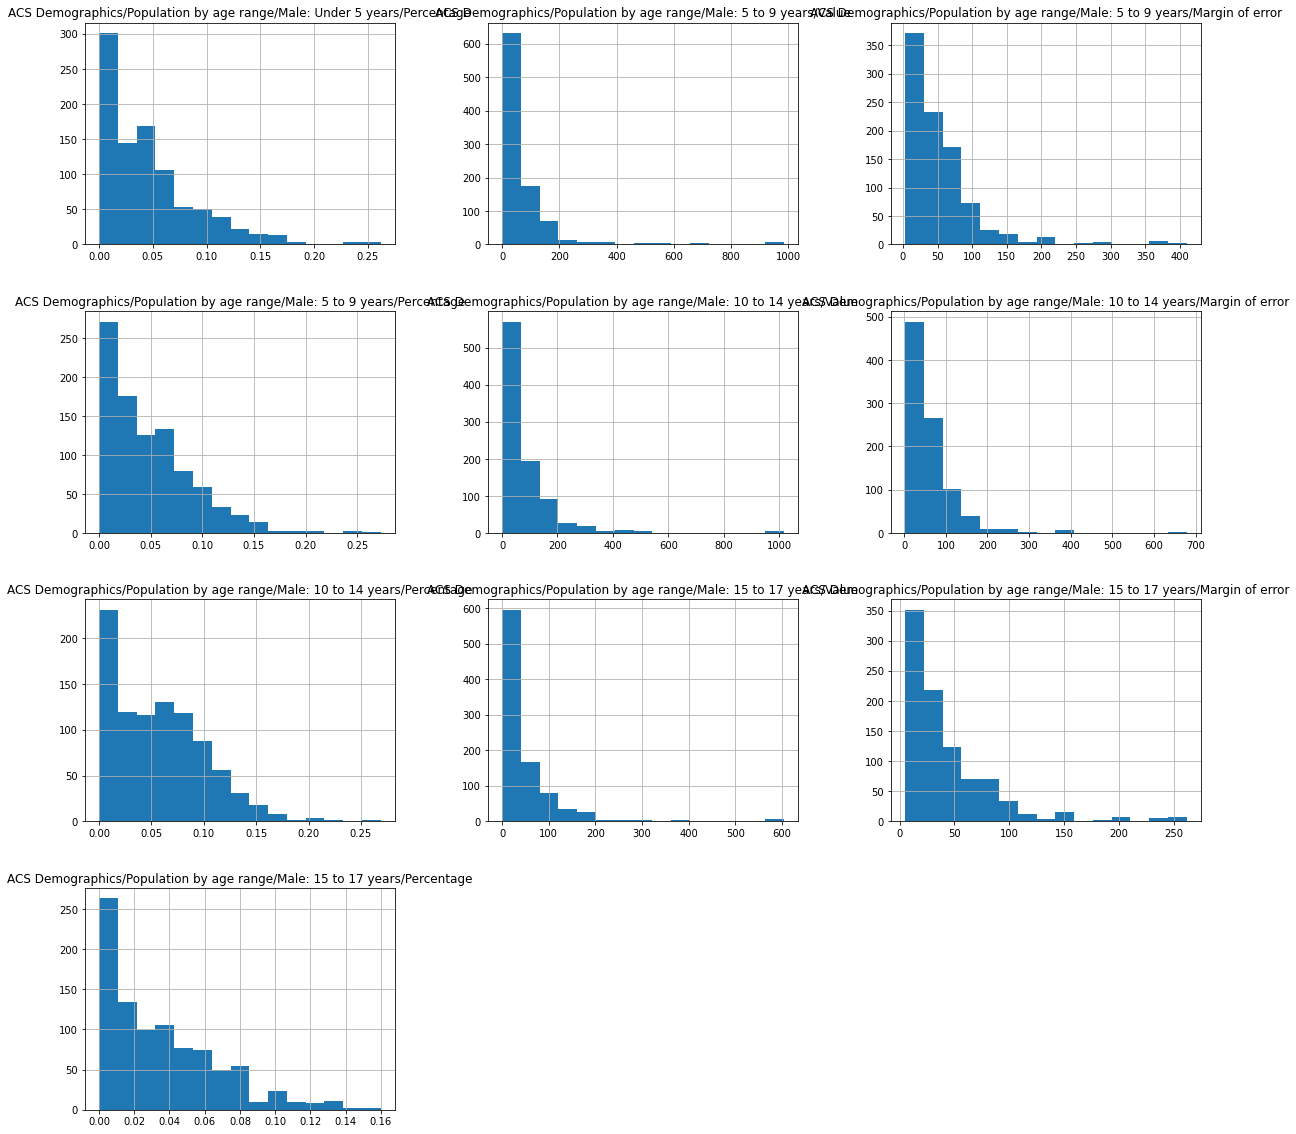

In [32]:
num_features = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
X[num_features[20:30]].hist(bins=15, figsize=(20, 20))

array([[<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 18 and 19 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 18 and 19 years/Margin of error'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 18 and 19 years/Percentage'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 20 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 20 years/Percentage'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 21 years/Value'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 21 years/Percentage'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 22 to 24 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 22 to 24 years/Margin of erro

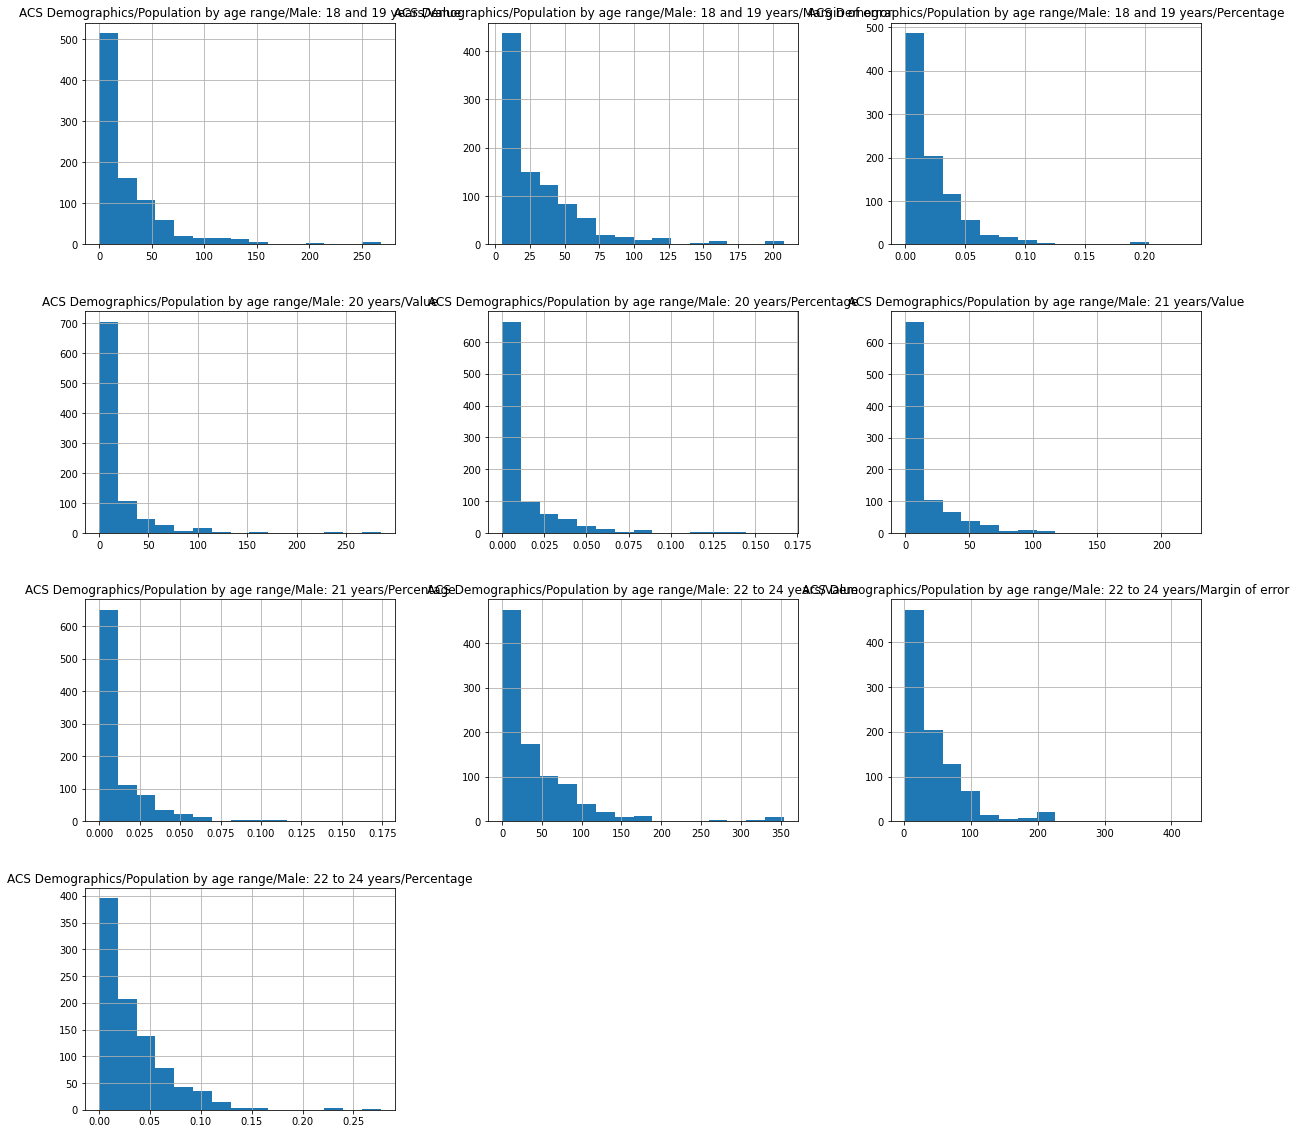

In [33]:
num_features = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
X[num_features[30:40]].hist(bins=15, figsize=(20, 20))


array([[<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 25 to 29 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 25 to 29 years/Margin of error'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 25 to 29 years/Percentage'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 30 to 34 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 30 to 34 years/Margin of error'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 30 to 34 years/Percentage'}>],
       [<AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 35 to 39 years/Value'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range/Male: 35 to 39 years/Margin of error'}>,
        <AxesSubplot:title={'center':'ACS Demographics/Population by age range

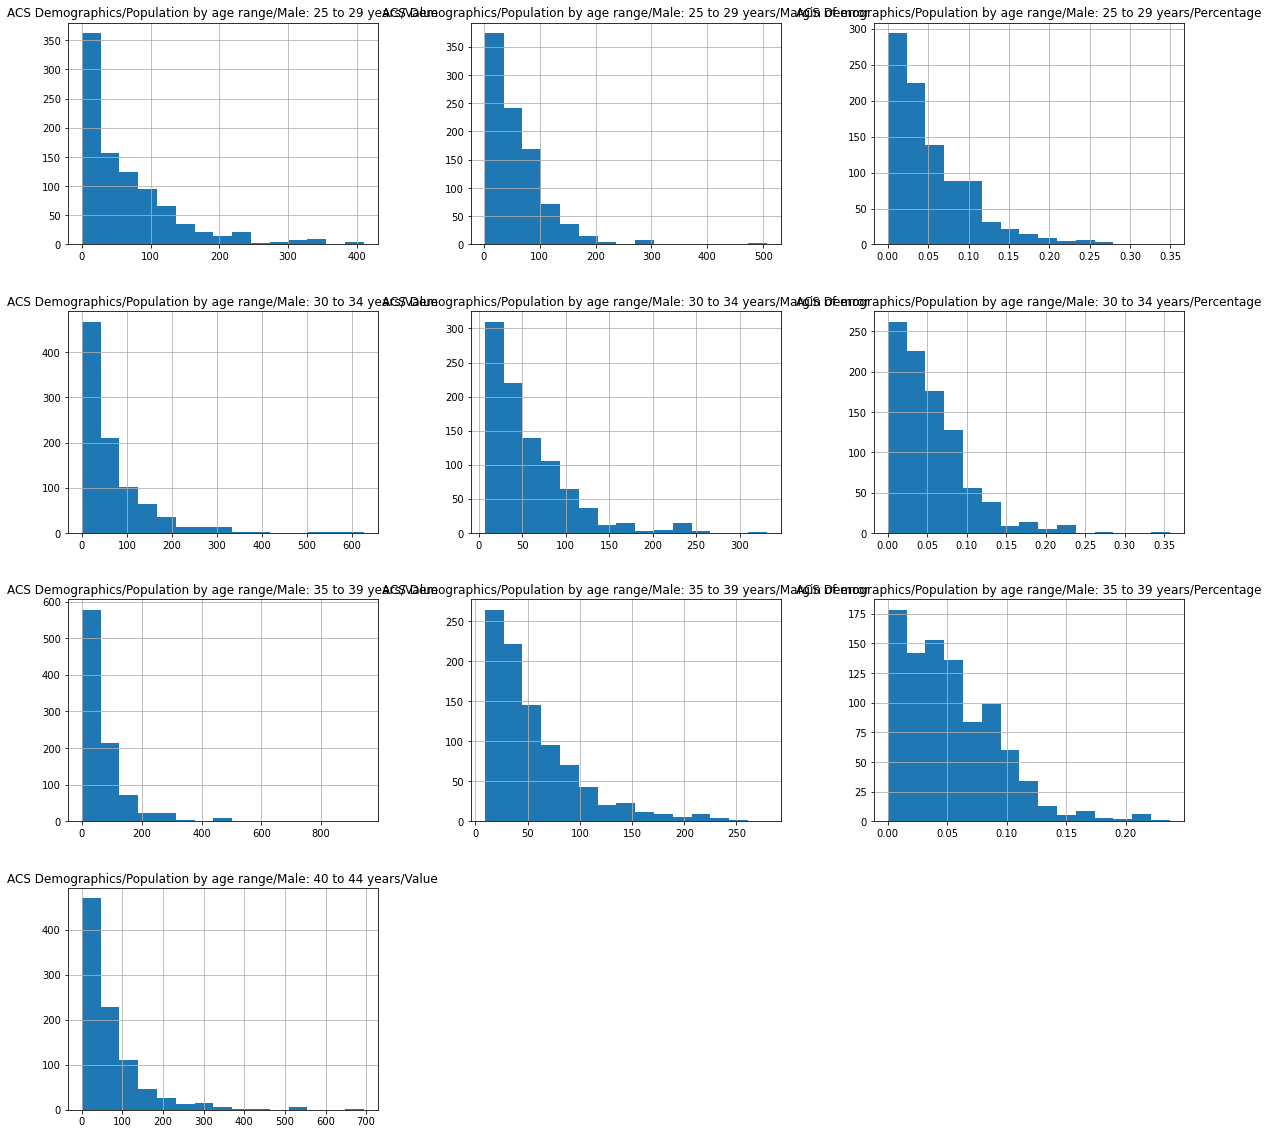

In [34]:
num_features = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]
X[num_features[40:50]].hist(bins=15, figsize=(20, 20))



In [35]:
wdf = ww.DataTable(X)
wdf

,Physical Type,Logical Type,Semantic Tag(s)
Data Column,,,
index,Int64,Integer,['numeric']
Address_x,string,NaturalLanguage,[]
Image_URL,string,NaturalLanguage,[]
Image_URL1,string,NaturalLanguage,[]
Image_URL2,string,NaturalLanguage,[]
Price,Int64,Integer,['numeric']
Beds,Int64,Integer,['numeric']
Baths,category,Categorical,['category']
Area,category,Categorical,['category']


In [36]:
NaturalLanguage = wdf.select(['NaturalLanguage'])
NaturalLanguage = NaturalLanguage.to_dataframe()
for col in NaturalLanguage.columns:
    X[col] = X[col].astype(str).replace('<NA>',np.nan)
    X[col] = X[col].fillna('No Data')
X

,index,Address_x,Image_URL,Image_URL1,Image_URL2,Price,Beds,Baths,Area,Noise,...,1/31/21,zillow_price,zillow_price_change,zillow_price_change_rate,zillow_price_change_percent,last_sold_price_change,last_sold_price_change_percent,last_sold_price_change_rate,yearly_price_delta,yearly_price_delta_percent
0,0,"1 Las Olas Cir Apt 517, Fort Lauderdale, FL, 3...",https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,649000,2,2,1350,Medium,...,511939.0,495061.0,16878.0,8439.000000,0.034093,49000.0,0.081667,2227.272727,-6211.727273,0.047574
1,1,"1 N Ocean Blvd Apt 610, Pompano Beach, FL, 33062",https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,689000,2,2,1479,Medium,...,353530.0,280804.0,72726.0,12121.000000,0.258992,49000.0,0.076563,2227.272727,-9893.727273,-0.182430
2,631,"2375 SE 10th St, Pompano Beach, FL, 33062",https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,689900,2,2,1522,Medium,...,353530.0,221403.0,132127.0,12011.545455,0.596771,394900.0,1.338644,17950.000000,5938.454545,0.741873
3,1327,"710 N Ocean Blvd Apt 503, Pompano Beach, FL, 3...",https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,369900,2,2,1028,Medium,...,353530.0,329454.0,24076.0,12038.000000,0.073078,109900.0,0.422692,4995.454545,-7042.545455,0.349614
4,1361,"750 N Ocean Blvd Apt 1101, Pompano Beach, FL, ...",https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,699900,2,2,1140,Medium,...,353530.0,219779.0,133751.0,14861.222222,0.608570,456900.0,1.880247,20768.181818,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1588,"Hialeah, FL, 33014",https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,495000,3,2,2250,Medium,...,372115.0,194998.0,177117.0,22139.625000,0.908302,303000.0,1.578125,13772.727273,-8366.897727,0.669823
936,1592,"Miami Gardens, FL, 33055",https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,325000,4,2,1652,Medium,...,357360.0,329200.0,28160.0,28160.000000,0.085541,-5000.0,-0.015152,-227.272727,-28387.272727,-0.100692
937,1594,"Miami, FL, 33156",https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,349900,2,2,1155,High,...,280484.0,154974.0,125510.0,13945.555556,0.809878,99900.0,0.399600,4540.909091,-9404.646465,-0.410278
938,1600,"Pembroke Pines, FL, 33024",https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,469900,5,2,2388,Medium,...,620969.0,501475.0,119494.0,23898.800000,0.238285,149900.0,0.468438,6813.636364,-17085.163636,0.230152


In [37]:
X['City_x'] = X['City_x'].astype('category')
X['County'] = X['County'].astype('category')
X = X.rename({'DaysOnRealtor':'DaysOnRealtor.com'},axis=1)
X

,index,Address_x,Image_URL,Image_URL1,Image_URL2,Price,Beds,Baths,Area,Noise,...,1/31/21,zillow_price,zillow_price_change,zillow_price_change_rate,zillow_price_change_percent,last_sold_price_change,last_sold_price_change_percent,last_sold_price_change_rate,yearly_price_delta,yearly_price_delta_percent
0,0,"1 Las Olas Cir Apt 517, Fort Lauderdale, FL, 3...",https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,649000,2,2,1350,Medium,...,511939.0,495061.0,16878.0,8439.000000,0.034093,49000.0,0.081667,2227.272727,-6211.727273,0.047574
1,1,"1 N Ocean Blvd Apt 610, Pompano Beach, FL, 33062",https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,689000,2,2,1479,Medium,...,353530.0,280804.0,72726.0,12121.000000,0.258992,49000.0,0.076563,2227.272727,-9893.727273,-0.182430
2,631,"2375 SE 10th St, Pompano Beach, FL, 33062",https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,689900,2,2,1522,Medium,...,353530.0,221403.0,132127.0,12011.545455,0.596771,394900.0,1.338644,17950.000000,5938.454545,0.741873
3,1327,"710 N Ocean Blvd Apt 503, Pompano Beach, FL, 3...",https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,369900,2,2,1028,Medium,...,353530.0,329454.0,24076.0,12038.000000,0.073078,109900.0,0.422692,4995.454545,-7042.545455,0.349614
4,1361,"750 N Ocean Blvd Apt 1101, Pompano Beach, FL, ...",https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,699900,2,2,1140,Medium,...,353530.0,219779.0,133751.0,14861.222222,0.608570,456900.0,1.880247,20768.181818,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1588,"Hialeah, FL, 33014",https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,495000,3,2,2250,Medium,...,372115.0,194998.0,177117.0,22139.625000,0.908302,303000.0,1.578125,13772.727273,-8366.897727,0.669823
936,1592,"Miami Gardens, FL, 33055",https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,325000,4,2,1652,Medium,...,357360.0,329200.0,28160.0,28160.000000,0.085541,-5000.0,-0.015152,-227.272727,-28387.272727,-0.100692
937,1594,"Miami, FL, 33156",https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,349900,2,2,1155,High,...,280484.0,154974.0,125510.0,13945.555556,0.809878,99900.0,0.399600,4540.909091,-9404.646465,-0.410278
938,1600,"Pembroke Pines, FL, 33024",https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,469900,5,2,2388,Medium,...,620969.0,501475.0,119494.0,23898.800000,0.238285,149900.0,0.468438,6813.636364,-17085.163636,0.230152


In [38]:
names = [col for col in X.columns if 'name' in col.lower() or 'type' in col.lower()]
for col in names:
    X[col] = X[col].astype('category')
X

,index,Address_x,Image_URL,Image_URL1,Image_URL2,Price,Beds,Baths,Area,Noise,...,1/31/21,zillow_price,zillow_price_change,zillow_price_change_rate,zillow_price_change_percent,last_sold_price_change,last_sold_price_change_percent,last_sold_price_change_rate,yearly_price_delta,yearly_price_delta_percent
0,0,"1 Las Olas Cir Apt 517, Fort Lauderdale, FL, 3...",https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,https://ap.rdcpix.com/0a94ad8f3794006d77fd642e...,649000,2,2,1350,Medium,...,511939.0,495061.0,16878.0,8439.000000,0.034093,49000.0,0.081667,2227.272727,-6211.727273,0.047574
1,1,"1 N Ocean Blvd Apt 610, Pompano Beach, FL, 33062",https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,https://ap.rdcpix.com/1041dd209aa1020ef9d06dc7...,689000,2,2,1479,Medium,...,353530.0,280804.0,72726.0,12121.000000,0.258992,49000.0,0.076563,2227.272727,-9893.727273,-0.182430
2,631,"2375 SE 10th St, Pompano Beach, FL, 33062",https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,https://ap.rdcpix.com/91b0b7d798e068eb11fca991...,689900,2,2,1522,Medium,...,353530.0,221403.0,132127.0,12011.545455,0.596771,394900.0,1.338644,17950.000000,5938.454545,0.741873
3,1327,"710 N Ocean Blvd Apt 503, Pompano Beach, FL, 3...",https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,https://ap.rdcpix.com/716d92179deb6bba96fb108c...,369900,2,2,1028,Medium,...,353530.0,329454.0,24076.0,12038.000000,0.073078,109900.0,0.422692,4995.454545,-7042.545455,0.349614
4,1361,"750 N Ocean Blvd Apt 1101, Pompano Beach, FL, ...",https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,https://ap.rdcpix.com/0a6b5a0e9bdc54d41f6d9eed...,699900,2,2,1140,Medium,...,353530.0,219779.0,133751.0,14861.222222,0.608570,456900.0,1.880247,20768.181818,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1588,"Hialeah, FL, 33014",https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,https://ap.rdcpix.com/5cb22efbeeacbe94e2c36bd8...,495000,3,2,2250,Medium,...,372115.0,194998.0,177117.0,22139.625000,0.908302,303000.0,1.578125,13772.727273,-8366.897727,0.669823
936,1592,"Miami Gardens, FL, 33055",https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,https://ap.rdcpix.com/32a80c05c177393e5c2cb991...,325000,4,2,1652,Medium,...,357360.0,329200.0,28160.0,28160.000000,0.085541,-5000.0,-0.015152,-227.272727,-28387.272727,-0.100692
937,1594,"Miami, FL, 33156",https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,https://ap.rdcpix.com/59a889d85648bd7c78f0b83f...,349900,2,2,1155,High,...,280484.0,154974.0,125510.0,13945.555556,0.809878,99900.0,0.399600,4540.909091,-9404.646465,-0.410278
938,1600,"Pembroke Pines, FL, 33024",https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,https://ap.rdcpix.com/9948ccf7025e9b51f5586a14...,469900,5,2,2388,Medium,...,620969.0,501475.0,119494.0,23898.800000,0.238285,149900.0,0.468438,6813.636364,-17085.163636,0.230152


In [39]:
X['FloodFactorInfo'] = 'flood_factor_' + X['FloodFactorInfo'].astype(str)
X['FloodFactorInfo'].value_counts()


flood_factor_1     435
flood_factor_6     125
flood_factor_9      91
flood_factor_10     88
flood_factor_3      56
flood_factor_4      42
flood_factor_2      40
flood_factor_5      32
flood_factor_7      18
flood_factor_8      13
Name: FloodFactorInfo, dtype: int64

In [40]:
X['FloodFactorInfo'] = np.where(X['FloodFactorInfo'].isin(['flood_factor_10','flood_factor_9','flood_factor_8','flood_factor_7','flood_factor_6']), 'flood_factor_high', X['FloodFactorInfo'])
X['FloodFactorInfo'] = np.where(X['FloodFactorInfo'].isin(['flood_factor_1','flood_factor_2','flood_factor_3','flood_factor_4','flood_factor_5']), 'flood_factor_low', X['FloodFactorInfo'])
X['FloodFactorInfo'].value_counts()

flood_factor_low     605
flood_factor_high    335
Name: FloodFactorInfo, dtype: int64

In [41]:
X = X[X['Area'] != '7125 lot']
X = X[X['Area'] != '7500 lot']


In [42]:

wf = ww.DataTable(X)
NaturalLanguage = wf.select(['NaturalLanguage'])
NaturalLanguage = NaturalLanguage.to_dataframe()
for col in NaturalLanguage.columns:
    if col not in ['text_blob','Description']:
        X[col] = X[col].astype('category')

drops = []

l = ['ACS Housing/Units in structure','District',  
     'Census Block', 
     'Birthday', 
     'Current Representative', 
     'ACS Social', 
     'Metro', 'ACS Families', 
     'Combined Statistical Area Code', 
     'Accuracy Type', 
     'ACS Families',
     'Current Senator', 
     'ACS Demographics',
     'ACS Housing',
     'ACS Economics',
     'last_sold_price_change_rate',
     #'text_blob',
     'Description',
     'Zip',
     'Combined Statistical Area Name',
     'Census Tract Code',
     'Census Block Code',
     'zipbeds',
     'last_sold_price_change_percent',
     'State',
     'LastSoldDate',
     'Number', 
     'Street', 
     'Unit Type', 
     'Price', 
     'LastSoldAmt',
     'Price',
     'Address_x', 
     'RegionID', 
     'RegionName', 
     'RegionType', 
     'StateName', 
     'City_y', 
     'Metro',
     'CountyName',
     '1/31/21',
     'zillow_price',
     'zillow_price_change',
     'zillow_price_change_rate',
     'zillow_price_change_percent',
     'last_sold_price_change',
     'PropertyHistory',
     'NearbySchoolInfo',
     'PropertyFeatures',
     'Source',
     'Place FIPS',
     'Place Name',
     'NearbyHomeValues',
     'Address_y',
     'NeighborhoodInfo'
     
    ]

for col in X.columns:
    for s in l:
        if s.lower() in col.lower() and s.lower() != 'yearly_price_delta_percent':
            drops.append(col)
    
drops = [x for x in drops if x not in ['yearly_price_delta_percent', 'yearly_price_delta', 'Price', 'LastSoldAmt', 'Address_x']]
X = X.drop(drops,axis=1)


X['Baths'] = X['Baths'].astype(str).str.replace('+','').astype(float)
X['Beds'] =X['Beds'].astype(float)
X['Area'] = X['Area'].astype(float)
X['YearBuilt'] = X['YearBuilt'].astype(float)
X['DaysOnRealtor.com'] = X['DaysOnRealtor.com'].replace('1 Day','1').astype(float)

In [43]:
X['FloodFactorInfo'].value_counts()

flood_factor_low     605
flood_factor_high    333
Name: FloodFactorInfo, dtype: int64

In [44]:
X['Noise'].value_counts()

 Medium    592
 Low       283
 N/A        43
 High       17
Name: Noise, dtype: int64

In [45]:
X['FemaInfo'].value_counts()

X   ()       515
AE   ()      183
X500   ()    140
AH   ()       49
VE   ()       31
A   ()        12
AO   ()        7
C   ()         1
Name: FemaInfo, dtype: int64

In [46]:
X = X.drop(['LastSoldAmt','Accuracy Score','Image_URL2','Image_URL1','Image_URL','Address_x','Page_URL'],axis=1)
X

,index,Price,Beds,Baths,Area,Noise,PropertyType,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,City_x,County,FemaInfo,FloodFactorInfo,LastSoldYear,SizeRank,yearly_price_delta,yearly_price_delta_percent
0,0,649000,2.0,2.0,1350.0,Medium,Condo,412.0,1970.0,26.118226,-80.106961,Fort Lauderdale,Broward County,X500 (),flood_factor_high,2019,6556,-6211.727273,0.047574
1,1,689000,2.0,2.0,1479.0,Medium,Condo,156.0,2008.0,26.232514,-80.091608,Pompano Beach,Broward County,X500 (),flood_factor_high,2015,1036,-9893.727273,-0.182430
2,631,689900,2.0,2.0,1522.0,Medium,Single Family Home,43.0,1955.0,26.218289,-80.101402,Pompano Beach,Broward County,AE (),flood_factor_high,2010,1036,5938.454545,0.741873
3,1327,369900,2.0,2.0,1028.0,Medium,Condo,62.0,1964.0,26.243361,-80.087224,Pompano Beach,Broward County,VE (),flood_factor_high,2019,1036,-7042.545455,0.349614
4,1361,699900,2.0,2.0,1140.0,Medium,Condo,691.0,1970.0,26.244593,-80.087189,Pompano Beach,Broward County,X (),flood_factor_low,2012,1036,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1588,495000,3.0,2.0,2250.0,Medium,Single Family Home,43.0,1961.0,25.904128,-80.302463,Hialeah,Miami-Dade County,X (),flood_factor_low,2013,2107,-8366.897727,0.669823
936,1592,325000,4.0,2.0,1652.0,Medium,Single Family Home,185.0,2006.0,25.922669,-80.172813,Miami,Miami-Dade County,X (),flood_factor_low,2020,2819,-28387.272727,-0.100692
937,1594,349900,2.0,2.0,1155.0,High,Condo,39.0,2007.0,25.679270,-80.317274,Miami,Miami-Dade County,X (),flood_factor_low,2012,3187,-9404.646465,-0.410278
938,1600,469900,5.0,2.0,2388.0,Medium,Single Family Home,52.0,1978.0,26.027261,-80.244711,Pembroke Pines,Broward County,X500 (),flood_factor_high,2016,158,-17085.163636,0.230152


In [47]:
X = X.drop(['index','Price'],axis=1)
X = X.reset_index()
X

,index,Beds,Baths,Area,Noise,PropertyType,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,City_x,County,FemaInfo,FloodFactorInfo,LastSoldYear,SizeRank,yearly_price_delta,yearly_price_delta_percent
0,0,2.0,2.0,1350.0,Medium,Condo,412.0,1970.0,26.118226,-80.106961,Fort Lauderdale,Broward County,X500 (),flood_factor_high,2019,6556,-6211.727273,0.047574
1,1,2.0,2.0,1479.0,Medium,Condo,156.0,2008.0,26.232514,-80.091608,Pompano Beach,Broward County,X500 (),flood_factor_high,2015,1036,-9893.727273,-0.182430
2,2,2.0,2.0,1522.0,Medium,Single Family Home,43.0,1955.0,26.218289,-80.101402,Pompano Beach,Broward County,AE (),flood_factor_high,2010,1036,5938.454545,0.741873
3,3,2.0,2.0,1028.0,Medium,Condo,62.0,1964.0,26.243361,-80.087224,Pompano Beach,Broward County,VE (),flood_factor_high,2019,1036,-7042.545455,0.349614
4,4,2.0,2.0,1140.0,Medium,Condo,691.0,1970.0,26.244593,-80.087189,Pompano Beach,Broward County,X (),flood_factor_low,2012,1036,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,935,3.0,2.0,2250.0,Medium,Single Family Home,43.0,1961.0,25.904128,-80.302463,Hialeah,Miami-Dade County,X (),flood_factor_low,2013,2107,-8366.897727,0.669823
934,936,4.0,2.0,1652.0,Medium,Single Family Home,185.0,2006.0,25.922669,-80.172813,Miami,Miami-Dade County,X (),flood_factor_low,2020,2819,-28387.272727,-0.100692
935,937,2.0,2.0,1155.0,High,Condo,39.0,2007.0,25.679270,-80.317274,Miami,Miami-Dade County,X (),flood_factor_low,2012,3187,-9404.646465,-0.410278
936,938,5.0,2.0,2388.0,Medium,Single Family Home,52.0,1978.0,26.027261,-80.244711,Pembroke Pines,Broward County,X500 (),flood_factor_high,2016,158,-17085.163636,0.230152


In [48]:
X = X.rename({'FloodFactorInfo':'FloodFactorHigh'},axis=1)
X['FloodFactorHigh'] = np.where(X['FloodFactorHigh']=='flood_factor_high',True, False)
X

,index,Beds,Baths,Area,Noise,PropertyType,DaysOnRealtor.com,YearBuilt,Latitude,Longitude,City_x,County,FemaInfo,FloodFactorHigh,LastSoldYear,SizeRank,yearly_price_delta,yearly_price_delta_percent
0,0,2.0,2.0,1350.0,Medium,Condo,412.0,1970.0,26.118226,-80.106961,Fort Lauderdale,Broward County,X500 (),True,2019,6556,-6211.727273,0.047574
1,1,2.0,2.0,1479.0,Medium,Condo,156.0,2008.0,26.232514,-80.091608,Pompano Beach,Broward County,X500 (),True,2015,1036,-9893.727273,-0.182430
2,2,2.0,2.0,1522.0,Medium,Single Family Home,43.0,1955.0,26.218289,-80.101402,Pompano Beach,Broward County,AE (),True,2010,1036,5938.454545,0.741873
3,3,2.0,2.0,1028.0,Medium,Condo,62.0,1964.0,26.243361,-80.087224,Pompano Beach,Broward County,VE (),True,2019,1036,-7042.545455,0.349614
4,4,2.0,2.0,1140.0,Medium,Condo,691.0,1970.0,26.244593,-80.087189,Pompano Beach,Broward County,X (),False,2012,1036,5906.959596,1.271676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,935,3.0,2.0,2250.0,Medium,Single Family Home,43.0,1961.0,25.904128,-80.302463,Hialeah,Miami-Dade County,X (),False,2013,2107,-8366.897727,0.669823
934,936,4.0,2.0,1652.0,Medium,Single Family Home,185.0,2006.0,25.922669,-80.172813,Miami,Miami-Dade County,X (),False,2020,2819,-28387.272727,-0.100692
935,937,2.0,2.0,1155.0,High,Condo,39.0,2007.0,25.679270,-80.317274,Miami,Miami-Dade County,X (),False,2012,3187,-9404.646465,-0.410278
936,938,5.0,2.0,2388.0,Medium,Single Family Home,52.0,1978.0,26.027261,-80.244711,Pembroke Pines,Broward County,X500 (),True,2016,158,-17085.163636,0.230152


In [54]:
X = X.drop('County',axis=1)

In [55]:
Xw = ww.DataTable(X)
mi = Xw.mutual_information()
mi.head(50)

,column_1,column_2,mutual_info
0,Latitude,Longitude,0.383404
1,Baths,Area,0.273485
2,Beds,Area,0.257375
3,Beds,PropertyType,0.236541
4,Beds,Baths,0.235500
5,Latitude,FemaInfo,0.173528
6,LastSoldYear,yearly_price_delta,0.172709
7,Longitude,SizeRank,0.158600
8,FemaInfo,FloodFactorHigh,0.145259
9,Latitude,SizeRank,0.135237


In [51]:
X.to_csv('../data/processed/trainset.csv',index=False)